# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
from tensorflow import keras
print(keras.__version__)

3.5.0


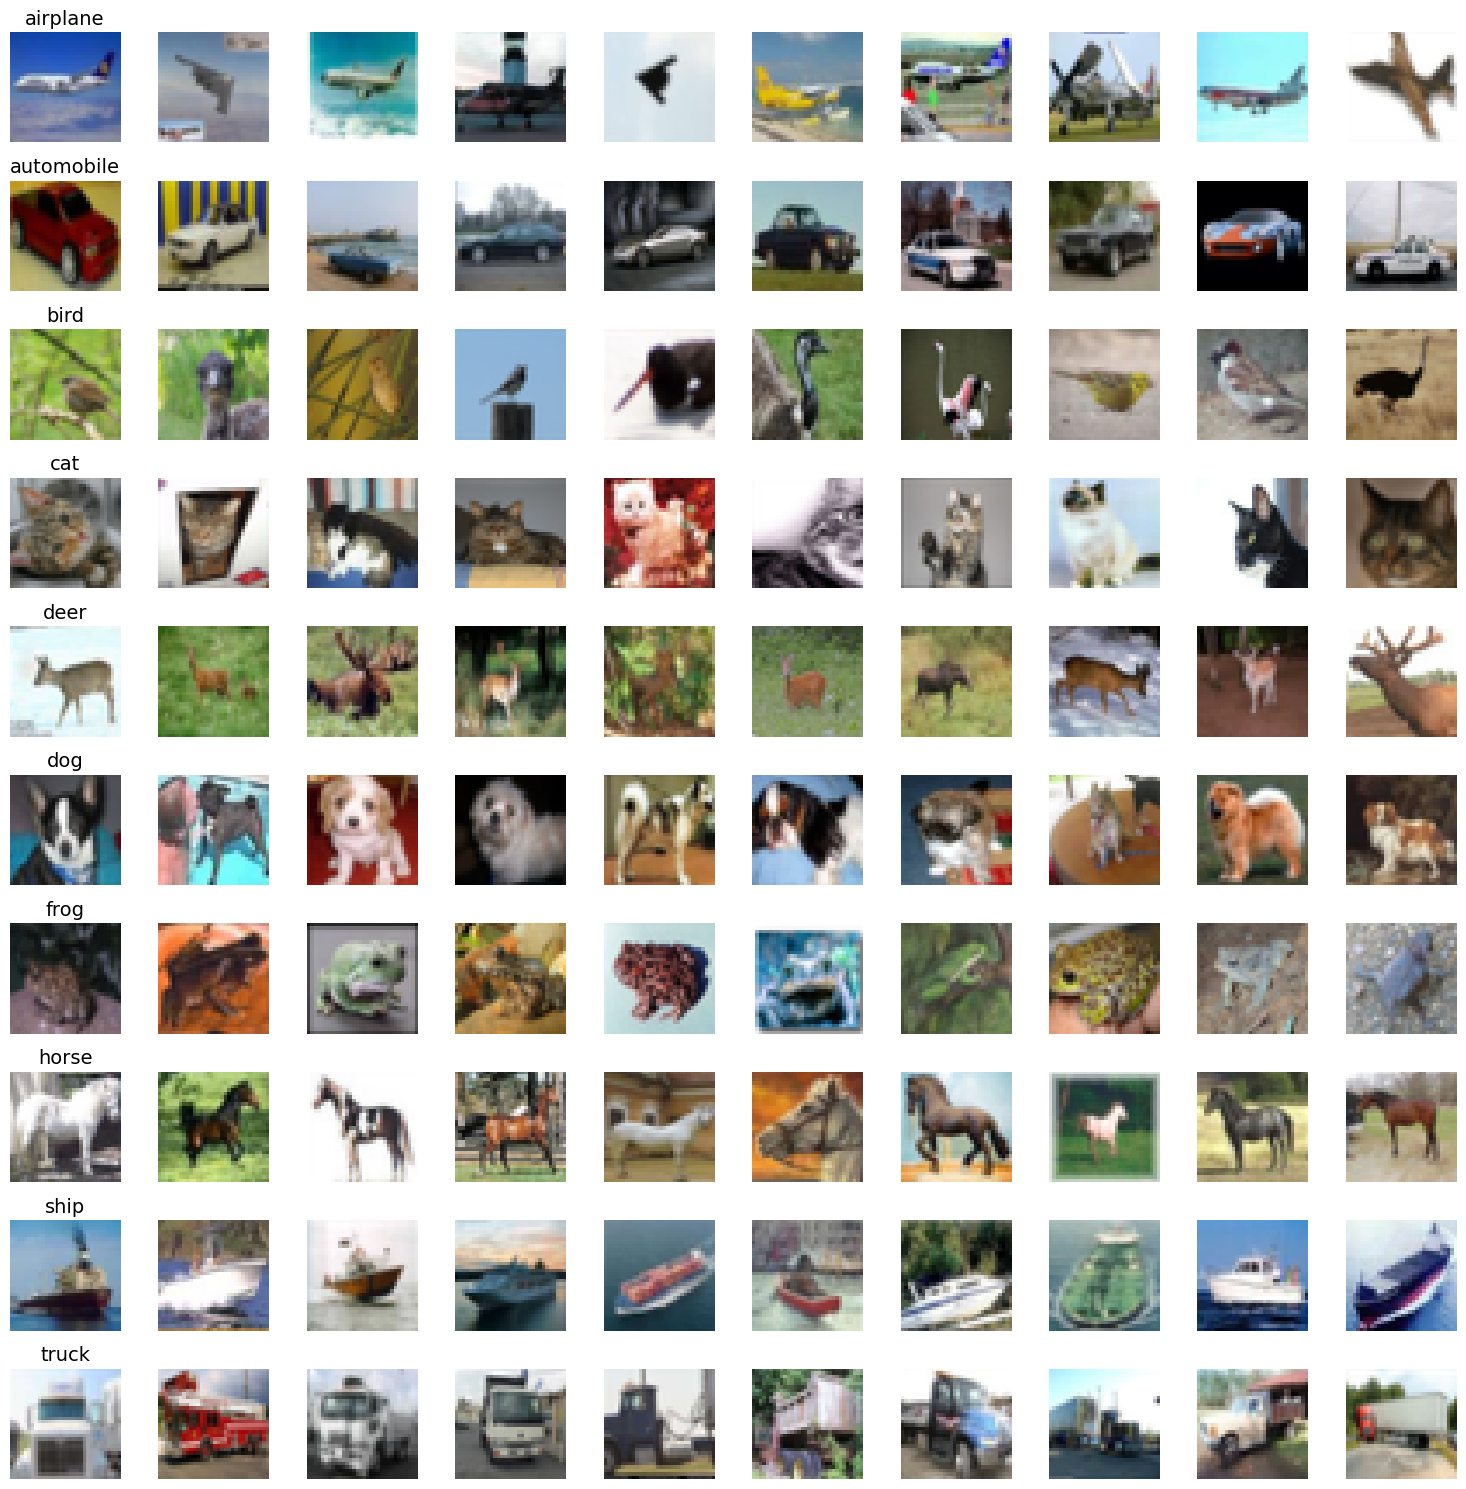

In [3]:
#Naming the classes:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Setting the figure size:
plt.figure(figsize=(15, 15))

# Number of classes and sample to display
num_classes = 10
num_samples = 10

#Iterating through each class
for class_idx in range(num_classes):
    # Get all the indexes of images for a given class
    class_indices = np.where(y_train == class_idx)[0]
    # Randomly select 10 images for this class
    random_indices = np.random.choice(class_indices, num_samples, replace=False)

    # Plot each selected image
    for i, img_idx in enumerate(random_indices):
        plt.subplot(num_classes, num_samples, class_idx * num_samples + i + 1)
        plt.imshow(x_train[img_idx])
        plt.axis('off')  # Hide the axis
        if i == 0:
            plt.title(class_names[class_idx], fontsize=14)  # Label each class with its name

# Show the plot
plt.tight_layout()
plt.show()

Convert the labels to one-hot encoded form.


In [4]:
from tensorflow.keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Check the shapes after one-hot encoding
print(y_train.shape)  # Should be (50000, 10)
print(y_test.shape)   # Should be (10000, 10)


(50000, 10)
(10000, 10)


Normalize the images

In [5]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
#These are RGB images so we are mixing red green and blue together to get a color. this changes this example from the self-guided lab which was B&W and we flattened like 28*28
x_train = x_train.reshape(50000, 32 * 32 * 3)
x_test = x_test.reshape(10000, 32 * 32 * 3)

print(x_train.shape)
print(x_test.shape)


(50000, 3072)
(10000, 3072)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [7]:
from keras.backend import clear_session #this clear the current tensorflow session and frees up memory and helps avoid lagging and stuff. Used for memory management avoiding model conflicts and GPU resources
clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(100, input_dim=3072))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax')) #This is a multiclass classification, not binary, so we also use softmax

c:\Users\fmrol\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,310 (1.18 MB)

 Trainable params: 308,310 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size=512, epochs=50)
#it was giving error because I forgot the output layer with softmax

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1777 - loss: 2.2299
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2914 - loss: 2.0083
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3206 - loss: 1.9340
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3358 - loss: 1.8919
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3479 - loss: 1.8581
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3637 - loss: 1.8301
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3684 - loss: 1.8167
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3782 - loss: 1.7936
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3793 - loss: 1.7866
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3861 - loss: 1.7694
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3926 - loss: 1.7494
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3936 - lo

*   Plot the cross entropy loss curve and the accuracy curve

In [10]:
#Also called History Callback, to see the internal states and statistics of the model during training, here we see the cross entropy loss curve and the accuracy curve so lets start by printing cause why not

print(history.history.keys())



dict_keys(['accuracy', 'loss'])


In [11]:
print(history.history['loss'])
print(history.history['accuracy'])

[2.1490604877471924, 1.9867305755615234, 1.9211807250976562, 1.8809925317764282, 1.850381851196289, 1.8293207883834839, 1.8089237213134766, 1.7923508882522583, 1.7793209552764893, 1.7652181386947632, 1.7545794248580933, 1.742977499961853, 1.7331675291061401, 1.7236313819885254, 1.715319275856018, 1.7072181701660156, 1.6984152793884277, 1.6914374828338623, 1.6830084323883057, 1.676991581916809, 1.669948935508728, 1.6619826555252075, 1.657071590423584, 1.6509290933609009, 1.6446326971054077, 1.6392903327941895, 1.6336599588394165, 1.6288909912109375, 1.6228196620941162, 1.6171205043792725, 1.612799882888794, 1.6085221767425537, 1.603245735168457, 1.5982158184051514, 1.5938018560409546, 1.5913184881210327, 1.585023283958435, 1.5805643796920776, 1.5767754316329956, 1.571661353111267, 1.5673575401306152, 1.5642439126968384, 1.5602692365646362, 1.5558667182922363, 1.5521509647369385, 1.5486832857131958, 1.5439915657043457, 1.5417957305908203, 1.5373533964157104, 1.5328127145767212]
[0.221420

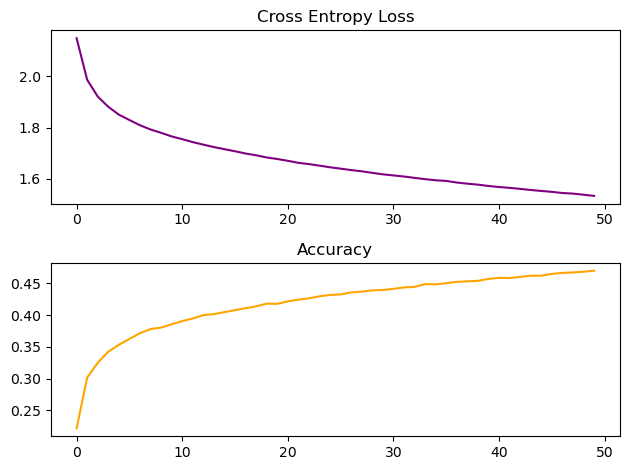

In [12]:
#now lets plot it

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='purple', label='train')

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='train')

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [13]:
from keras.backend import clear_session
clear_session()

In [20]:
# Reshape the data to match the input of the model
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# Normalize the pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the new VGG-style model
vgg_model = Sequential()

# First convolutional layer with 32 filters and a 3x3 kernel, ReLU activation
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Second convolutional layer with 32 filters and a 3x3 kernel, ReLU activation
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Max pooling layer
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
vgg_model.add(Flatten())

# Dense layer with 128 units
vgg_model.add(Dense(128, activation='relu'))

# Output layer with 10 units (for the 10 CIFAR-10 classes) and softmax activation
vgg_model.add(Dense(10, activation='softmax'))



*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [21]:
# Compile the model
vgg_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
history_vgg = vgg_model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.1057 - loss: 2.3025 - val_accuracy: 0.1127 - val_loss: 2.3024
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.1117 - loss: 2.3024 - val_accuracy: 0.1229 - val_loss: 2.3024
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.1204 - loss: 2.3024 - val_accuracy: 0.1008 - val_loss: 2.3024
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.1092 - loss: 2.3024 - val_accuracy: 0.1063 - val_loss: 2.3024
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 247ms/step - accuracy: 0.1258 - loss: 2.3024 - val_accuracy: 0.1119 - val_loss: 2.3024
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.1181 - loss: 2.3024 - val_accuracy: 0.1253 - val_loss: 2.3023
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.1225 - loss: 2.3024 - val_accuracy: 0.1032 - val_loss: 2.3023
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.1156 - loss: 2.3024 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

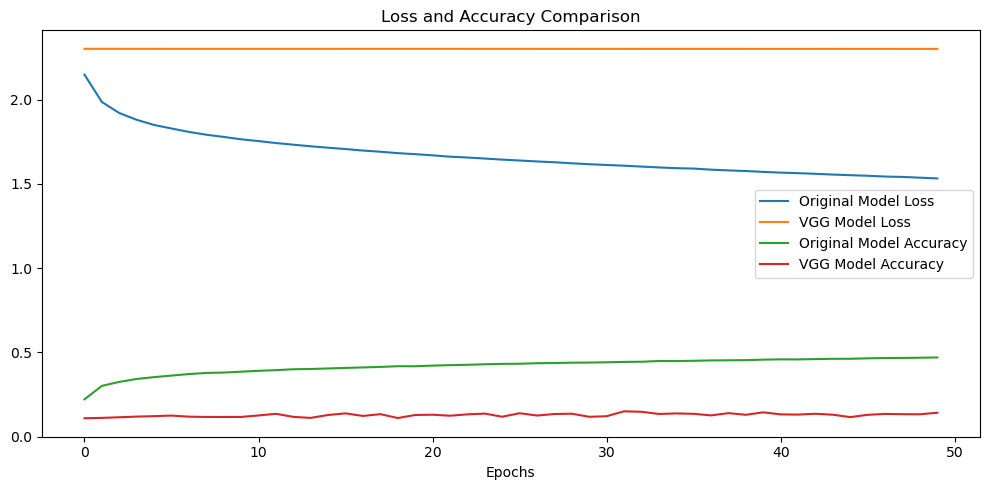

In [23]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy comparison
plt.figure(figsize=(10, 5))

# Loss plot
for metric in ['loss', 'accuracy']:
    plt.plot(history.history[metric], label=f'Original Model {metric.title()}')
    plt.plot(history_vgg.history[metric], label=f'VGG Model {metric.title()}')

plt.title('Loss and Accuracy Comparison')
plt.xlabel('Epochs')
plt.legend()
plt.tight_layout()
plt.show()


**Comment on the observation**

A lot of overftting. Very low accuracy. The original model was actually performing way better
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [24]:
# Get predictions from the model for the test data
y_pred = vgg_model.predict(x_test)

# Since the predictions are probabilities, we need to take the argmax to get the predicted class
y_pred_classes = y_pred.argmax(axis=1)

# The true labels are also in one-hot format, so we need to convert them to class labels
y_true = y_test.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


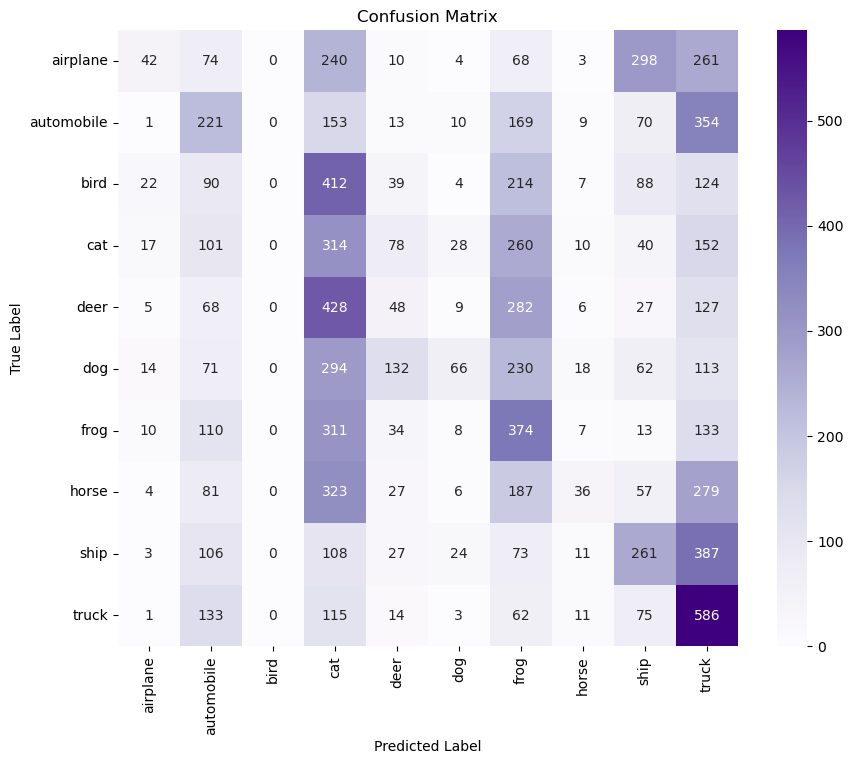

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**Comment here :**

243 cats were confused for dogs and 149 trucks were confused for automobiles. I understand they have things in common but come on.... there's really something wrong here but then the model loss and accuracy are a little too distant so there is also some overfitting as well
...

*    Print the test accuracy for the trained model.

In [26]:
# Evaluate
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)

# Print test accuracy
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1991 - loss: 2.3019
Test accuracy: 19.48%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [27]:
from keras.backend import clear_session
clear_session()

In [28]:
# Reshape the data back to (32, 32, 3)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)


# Add more convolutional layers for deeper feature extraction
vgg_model = Sequential()

# First set of convolutional layers
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second set of convolutional layers
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and dense layers
vgg_model.add(Flatten())
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dense(10, activation='softmax'))
# Your code here :

c:\Users\fmrol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Step 1: Compile the model
vgg_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

# Step 2: Train the model for 10 epochs with a batch size of 512
history_vgg = vgg_model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

# Step 3: Predict on the test set
y_pred = vgg_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Step 4: Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Epoch 1/10
61/98 ━━━━━━━━━━━━━━━━━━━━ 14s 393ms/step - accuracy: 0.1012 - loss: 2.3025

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

The activation function basically supervises if the information being processed by each neuron is really useful to pass to the next layer. If is not usefull, the activation function deactivates that neuron and if it is useful, it let it pass. We use it to basically "curate" the result so it is accurate. Activation functions are used for image recognition, and they are non-linear. In real life things are really non-linear and that is why they are used for images.

We need it so the information that passes is accurate and really helps the machine to learn and improve from what it learns. Thanks to the activation function, the network becomes faster, smarter and more accurate in recognizing the image. 

2 - Key Differences between sigmoid and softmax:

Sigmoid is used for binary classification, 1 or 0 (true or false), while softmax will break down any number in a scale of 0 to 1, since its functionality is for multitask decisions 


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is the process where the sigmoid function (which decise on binary outpouts) evaluates how far the neuron has made a decision from true or false. Neurons can give a range of error from 0.1 to 0.9, and deppending on this margin of error, binary crossentropy gives a high or low loss score. Categoricall crossentropy works kind of the same but for for categorical decisions, giving a low loss score to those neurons who almost got the desicion right and a high loss to those who were wrong in their decisions. 

_
